In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
superconductor_df = pd.read_csv('../datasets/train.csv')

superconductor_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
superconductor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
sc = StandardScaler()
rfr = RandomForestRegressor()

In [6]:
X = superconductor_df.drop(columns=['critical_temp'])
y = superconductor_df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [7]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [8]:
rfr.fit(X_train_sc,y_train)

RandomForestRegressor()

In [9]:
y_preds = rfr.predict(X_test_sc)

In [10]:
np.round(metrics.mean_absolute_error(y_test,y_preds),2)

5.9

In [11]:
np.round(np.sqrt(metrics.mean_squared_error(y_test,y_preds)),2)

10.37

In [12]:
metrics.explained_variance_score(y_test,y_preds)

0.9076050721358947

In [13]:
metrics.r2_score(y_test,y_preds)

0.9075749436679061

Text(0, 0.5, 'Predicted temp')

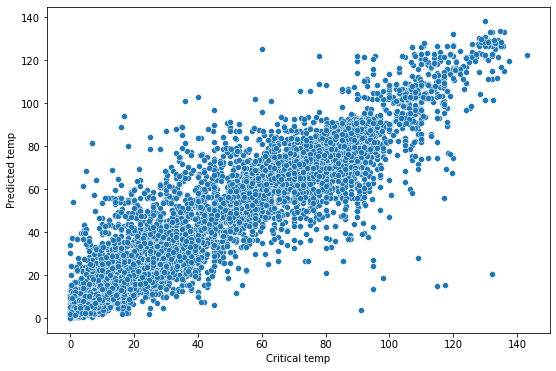

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=y_preds)
plt.xlabel('Critical temp')
plt.ylabel('Predicted temp')

In [15]:
y_diff = np.abs(y_test - y_preds)

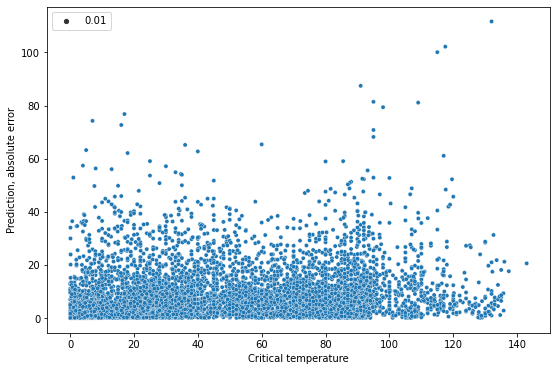

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=y_test,y=y_diff,size=0.01)
plt.xlabel('Critical temperature')
plt.ylabel('Prediction, absolute error');

In [18]:
elements_df = pd.read_csv('../datasets/unique_m.csv')
elements_df.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [ ]:
elements_df['material'].value_counts()

In [ ]:
Xe = elements_df.drop(columns=['critical_temp','material'])
ye = elements_df['critical_temp']

Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe,ye)

In [ ]:
Xe_train_sc = sc.fit_transform(Xe_train)
Xe_test_sc = sc.transform(Xe_test)

In [ ]:
rfr.fit(Xe_train_sc,ye_train)

In [ ]:
ye_preds = rfr.predict(Xe_test_sc)

In [ ]:
metrics.mean_absolute_error(ye_test,ye_preds)

In [ ]:
np.sqrt(metrics.mean_squared_error(ye_test,ye_preds))

In [ ]:
metrics.explained_variance_score(ye_test,ye_preds)

In [ ]:
metrics.r2_score(ye_test,ye_preds)

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=ye_test,y=ye_preds)
plt.xlabel('Critical temp')
plt.ylabel('Predicted temp')

In [ ]:
ye_diff = np.abs(ye_test - ye_preds)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=ye_test,y=ye_diff,size=0.01)
plt.xlabel('Critical temperature')
plt.ylabel('Prediction, absolute error');

In [ ]:
superconductor_df['critical_temp'] == elements_df['critical_temp']